# Laboratorio 8 Clasificación de Malware con DL
## Security Data Science
### Universidad del valle de Guatemala

Abner Ivan Garcia - 21285

Oscar Esteba Donis - 21610

In [1]:
!pip3 install keras
!pip3 install tensorflow

### Obteniendo Librerias

In [2]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
import os
import pandas as pd
import seaborn as sns

#### 1. En el preprocesamiento debe mostrar cuantos ejemplares hay por cada familia. En base a estos datos debe determinar si considera pertinente prescindir de ejemplares que tengan pocas observaciones.

In [3]:
path = './malimg_paper_dataset_imgs/'

Total number of malware families: 25
Total number of samples: 9339

Samples per family:


Family  Count
12       Allaple.A   2949
23       Allaple.L   1591
14         Yuner.A    800
1    Instantaccess    431
13           VB.AT    408
10        Fakerean    381
7       Lolyda.AA1    213
5      C2LOP.gen!g    200
24   Alueron.gen!J    198
20      Lolyda.AA2    184
2   Dialplatform.B    177
4        Dontovo.A    162
8        Lolyda.AT    159
11        Rbot!gen    158
6          C2LOP.P    146
19   Obfuscator.AD    142
15     Malex.gen!J    136
0    Swizzor.gen!I    132
16   Swizzor.gen!E    128
21      Lolyda.AA3    123
9        Adialer.C    122
17       Agent.FYI    116
3        Autorun.K    106
22      Wintrim.BX     97
18      Skintrim.N     80

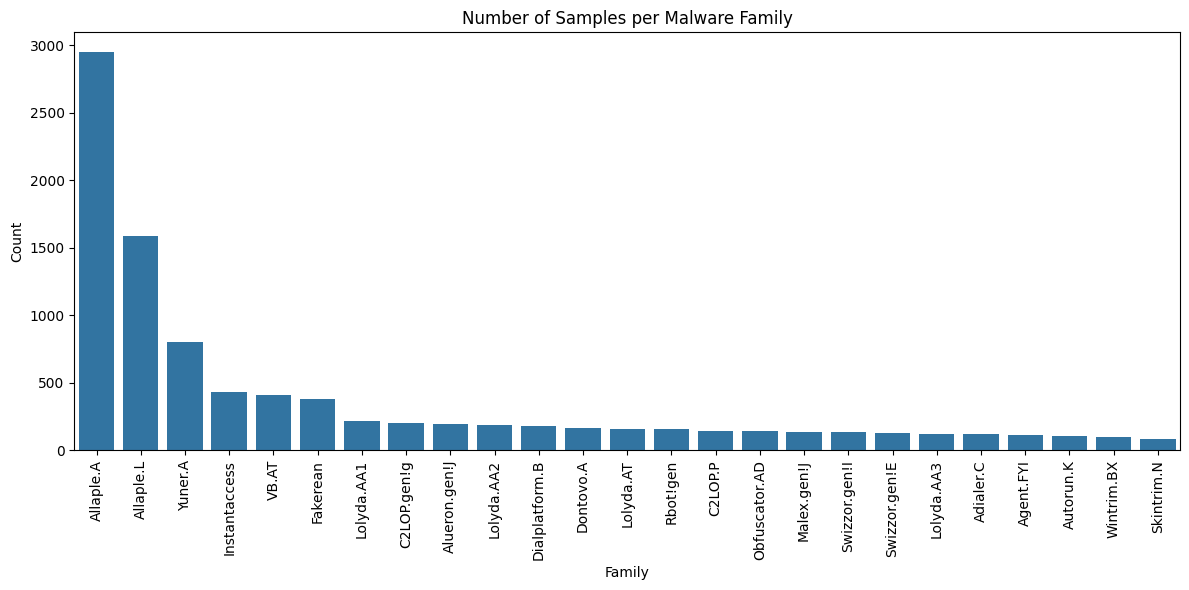

In [4]:
# Obtenemos la lista de familias de malware
malware_families = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

# Contamos el número de muestras por familia
family_counts = {}
for family in malware_families:
    family_path = os.path.join(path, family)
    count = len([f for f in os.listdir(family_path) if os.path.isfile(os.path.join(family_path, f))])
    family_counts[family] = count

# creamos un DataFrame para visualizar los datos
df_counts = pd.DataFrame(list(family_counts.items()), columns=['Family', 'Count'])
df_counts = df_counts.sort_values(by='Count', ascending=False)

# mostramos la información
print(f"Total number of malware families: {len(malware_families)}")
print(f"Total number of samples: {sum(family_counts.values())}")
print("\nSamples per family:")
display(df_counts)

# Visualizamos la distribución de las muestras por familia
plt.figure(figsize=(12, 6))
sns.barplot(x='Family', y='Count', data=df_counts)
plt.title('Number of Samples per Malware Family')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [5]:
# hacemos un shape 
df_counts.shape

(25, 2)

#### 2. Plotee algunas imágenes de los ejemplos de malware.

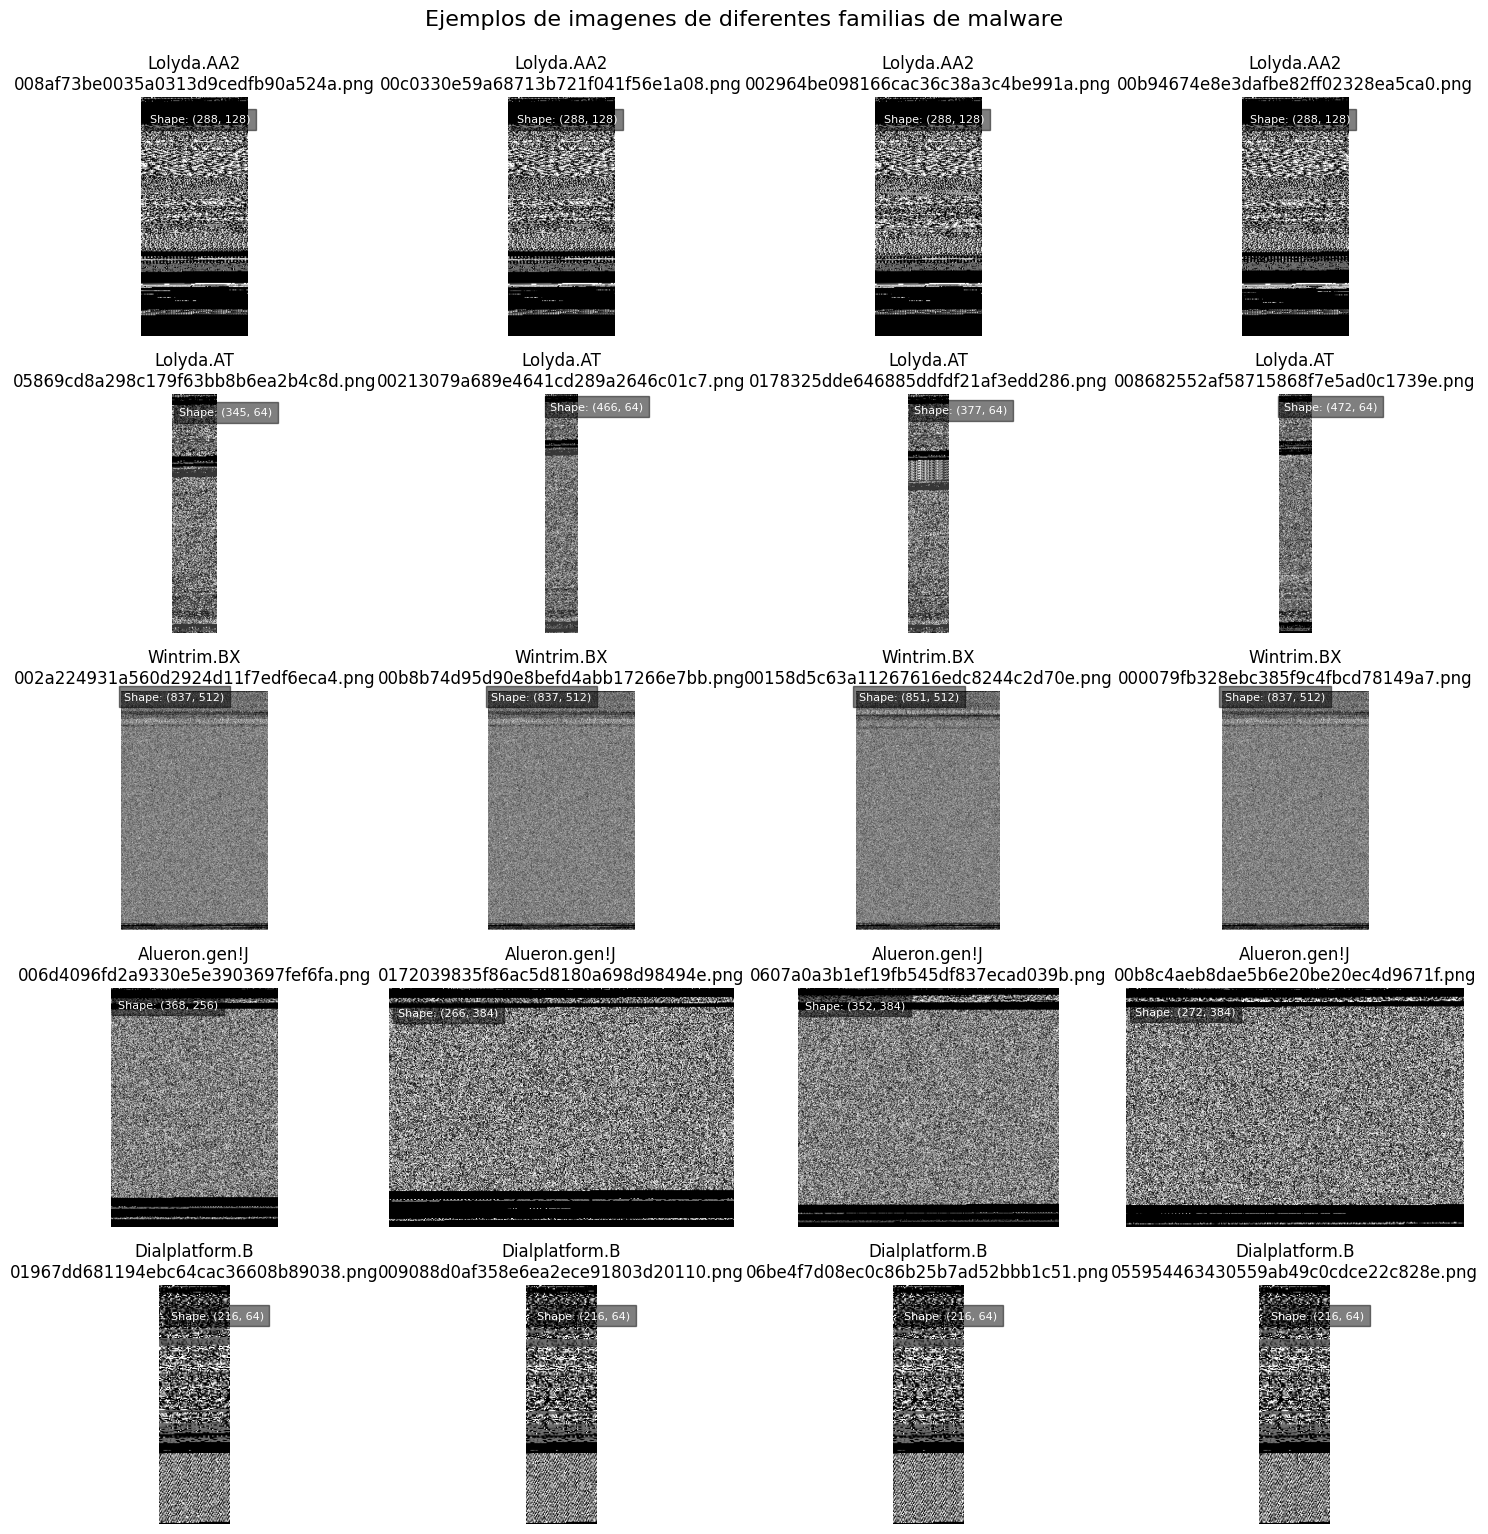

Examples from the smallest families: Skintrim.N, Wintrim.BX, Autorun.K


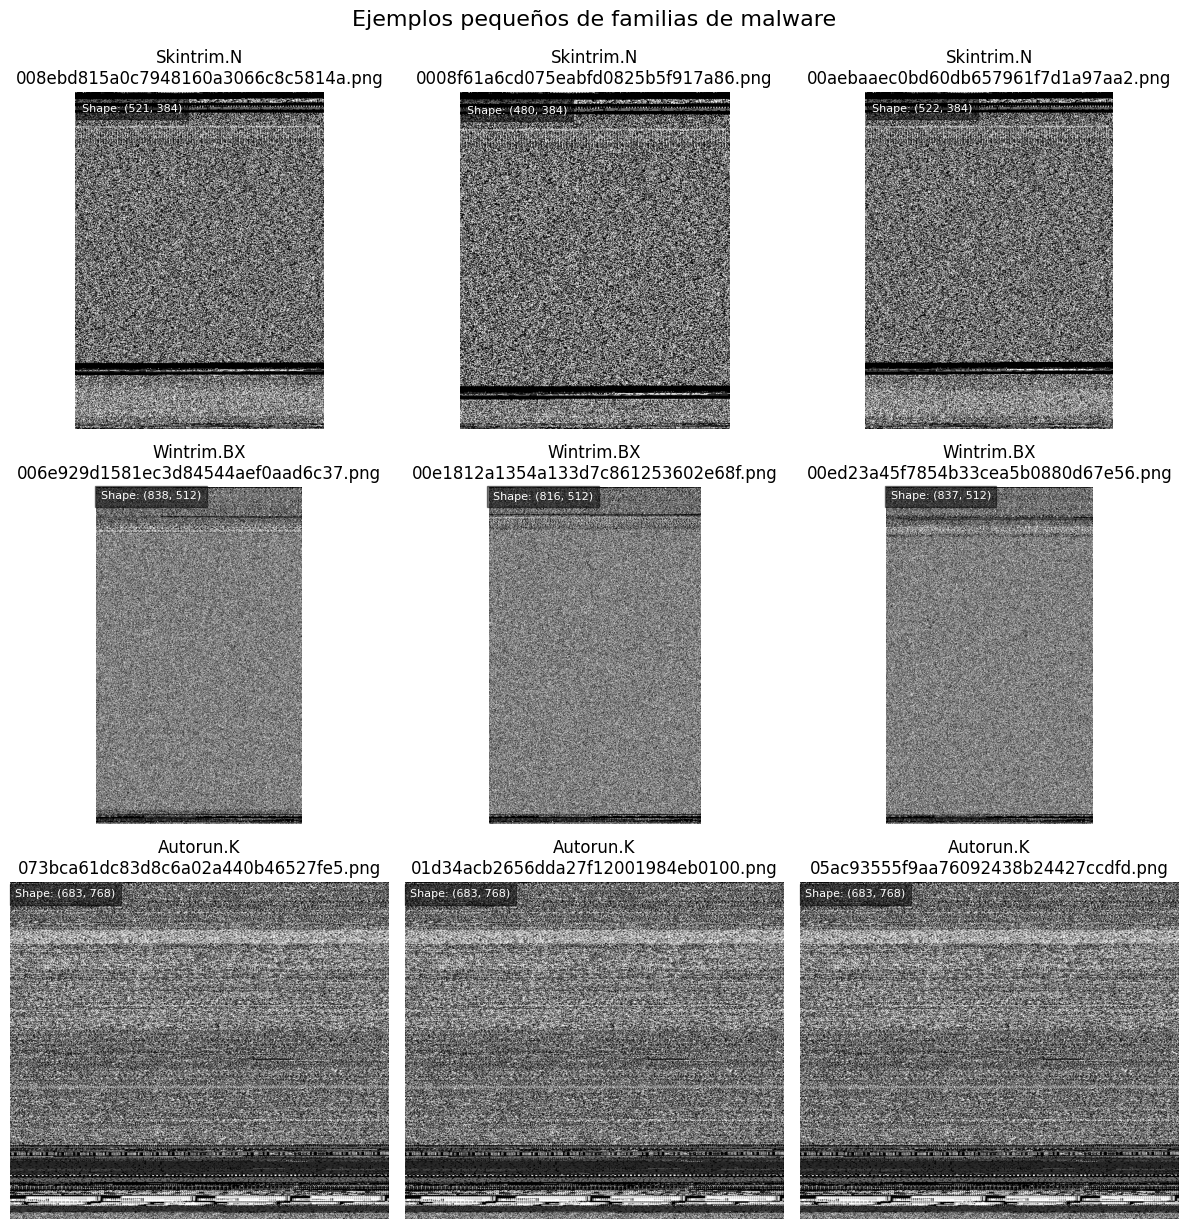

In [6]:
# función para cargar las imágenes y etiquetas
def plot_malware_examples(num_families=5, examples_per_family=3):
    # seleccionamos aleatoriamente un número de familias
    sample_families = random.sample(malware_families, min(num_families, len(malware_families)))
    
    # creamos una figura para mostrar las imágenes
    fig, axes = plt.subplots(len(sample_families), examples_per_family, figsize=(15, 3*len(sample_families)))
    
    # ajustamos el tamaño de los ejes si solo hay una familia
    if len(sample_families) == 1:
        axes = axes.reshape(1, -1)
    
    # iteramos sobre las familias seleccionadas y sus archivos 
    for i, family in enumerate(sample_families):
        family_path = os.path.join(path, family)
        files = [f for f in os.listdir(family_path) if os.path.isfile(os.path.join(family_path, f))]
        
        # muestra un número aleatorio de archivos de cada familia
        sample_files = random.sample(files, min(examples_per_family, len(files)))
        
        # iteramos sobre los archivos seleccionados y los mostramos en la figura 
        for j, file in enumerate(sample_files):
            img_path = os.path.join(family_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # ajustamos el tamaño de la imagen
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_title(f"{family}\n{file}")
            axes[i, j].axis('off')
            
            # agregamos información adicional sobre la imagen
            axes[i, j].text(10, 30, f"Shape: {img.shape}", color='white', fontsize=8,
                           bbox=dict(facecolor='black', alpha=0.5))
    
    plt.tight_layout()
    plt.suptitle("Ejemplos de imagenes de diferentes familias de malware", y=1.02, fontsize=16)
    plt.show()

# Mostramos ejemplos de malware de diferentes familias
plot_malware_examples(num_families=5, examples_per_family=4)

# Mostramos ejemplos de las familias más pequeñas 
smallest_families = df_counts.sort_values('Count').head(3)['Family'].tolist()
print(f"Examples from the smallest families: {', '.join(smallest_families)}")

# Aqui vamos a mostrar las imágenes de las familias más pequeñas
fig, axes = plt.subplots(len(smallest_families), 3, figsize=(12, 4*len(smallest_families)))
if len(smallest_families) == 1:
    axes = axes.reshape(1, -1)
# iteramos sobre las familias más pequeñas y sus archivos
for i, family in enumerate(smallest_families):
    family_path = os.path.join(path, family)
    files = [f for f in os.listdir(family_path) if os.path.isfile(os.path.join(family_path, f))]
    sample_files = files[:3] if len(files) >= 3 else files
    
    for j, file in enumerate(sample_files):
        if j < 3:  # Aseguramos que no exceda el número de columnas
            img_path = os.path.join(family_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_title(f"{family}\n{file}")
            axes[i, j].axis('off')
            axes[i, j].text(10, 30, f"Shape: {img.shape}", color='white', fontsize=8,
                           bbox=dict(facecolor='black', alpha=0.5))

plt.tight_layout()
plt.suptitle("Ejemplos pequeños de familias de malware", y=1.02, fontsize=16)
plt.show()

#### 3. Divida el dataset en un 70% entrenamiento y un 30% de pruebas.

In [7]:
# Normalizamos las datos
def normalize_image(image):
    # Normalizamos la imagen a un rango de 0 a 1
    return image / 255.0

# división de los datos en conjuntos de entrenamiento y prueba 70% entrenamiento y un 30% de pruebas
def load_data(path, test_size=0.3, random_state=42):
    images = []
    labels = []
    
    for family in malware_families:
        family_path = os.path.join(path, family)
        files = [f for f in os.listdir(family_path) if os.path.isfile(os.path.join(family_path, f))]
        
        for file in files:
            img_path = os.path.join(family_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))  # Redimensionamos la imagen
            img = normalize_image(img)  # Normalizamos la imagen
            
            images.append(img)
            labels.append(family)
    
    images = np.array(images)
    labels = np.array(labels)
    
    # Dividimos los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test


#### 4. Utilizando Keras y Tensorflow construya una red neuronal con las capas, funciones de activación y el optimizador que considere conveniente.

In [8]:
# Definicion del modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax'))  # 25 clases de malware

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 5. Muestre el resumen del modelo.

In [9]:
# mostrar el resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,801 (6.21 MB)

 Trainable params: 1,627,801 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

#### 6. Entrene el modelo con el número de épocas que considere conveniente.

In [10]:
# Obtener los datos de entrenamiento y prueba del paso 3
X_train, X_test, y_train, y_test = load_data(path)
X_train = np.expand_dims(X_train, axis=-1)  
X_test = np.expand_dims(X_test, axis=-1)  
y_train = LabelBinarizer().fit_transform(y_train)  
y_test = LabelBinarizer().fit_transform(y_test)  

# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4268 - loss: 2.0477 - val_accuracy: 0.8665 - val_loss: 0.5598
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8137 - loss: 0.6824 - val_accuracy: 0.9172 - val_loss: 0.2884
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8825 - loss: 0.3986 - val_accuracy: 0.9329 - val_loss: 0.2226
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9038 - loss: 0.3172 - val_accuracy: 0.9425 - val_loss: 0.1778
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9218 - loss: 0.2509 - val_accuracy: 0.9461 - val_loss: 0.1652
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9316 - loss: 0.2277 - val_accuracy: 0.9615 - val_loss: 0.1328
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9439 - loss: 0.1709 - val_accuracy: 0.9575 - val_loss: 0.1397
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9421 - loss: 0.1776 - val_accu

#### 7. Muestre las métricas de su modelo.

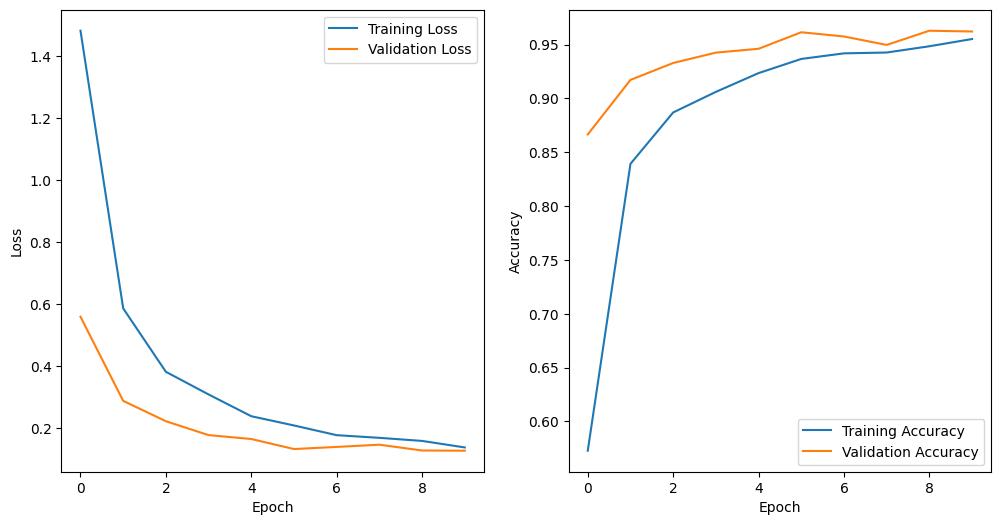

In [11]:
# Visualización del proceso de entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 8. Evalúe el modelo con el dataset de pruebas y muestre las métricas obtenidas. Discuta los resultados obtenidos.

In [12]:
# Evaluación del modelo con el dataset de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
print()

# Metricas obtenidas
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {accuracy:.4f}")
print(f"Recall: {accuracy:.4f}")
print(f"F1 Score: {accuracy:.4f}")

# Guardamos el modelo entrenado
model.save('malware_model.h5')


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9679 - loss: 0.1205


Loss: 0.1274, Accuracy: 0.9622

Loss: 0.1274
Accuracy: 0.9622
Precision: 0.9622
Recall: 0.9622
F1 Score: 0.9622


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        41
     Agent.FYI       1.00      1.00      1.00        38
     Allaple.A       1.00      1.00      1.00       878
     Allaple.L       1.00      1.00      1.00       466
 Alueron.gen!J       1.00      1.00      1.00        76
     Autorun.K       0.00      0.00      0.00        35
       C2LOP.P       0.83      0.56      0.67        45
   C2LOP.gen!g       0.82      0.94      0.88        72
Dialplatform.B       1.00      0.98      0.99        50
     Dontovo.A       1.00      1.00      1.00        34
      Fakerean       1.00      0.97      0.99       104
 Instantaccess       0.99      1.00      1.00       136
    Lolyda.AA1       0.99      1.00      0.99        69
    Lolyda.AA2       1.00      0.98      0.99        53
    Lolyda.AA3       1.00      1.00      1.00        36
     Lolyda.AT       1.00      0.98      0.99        46
   Malex

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

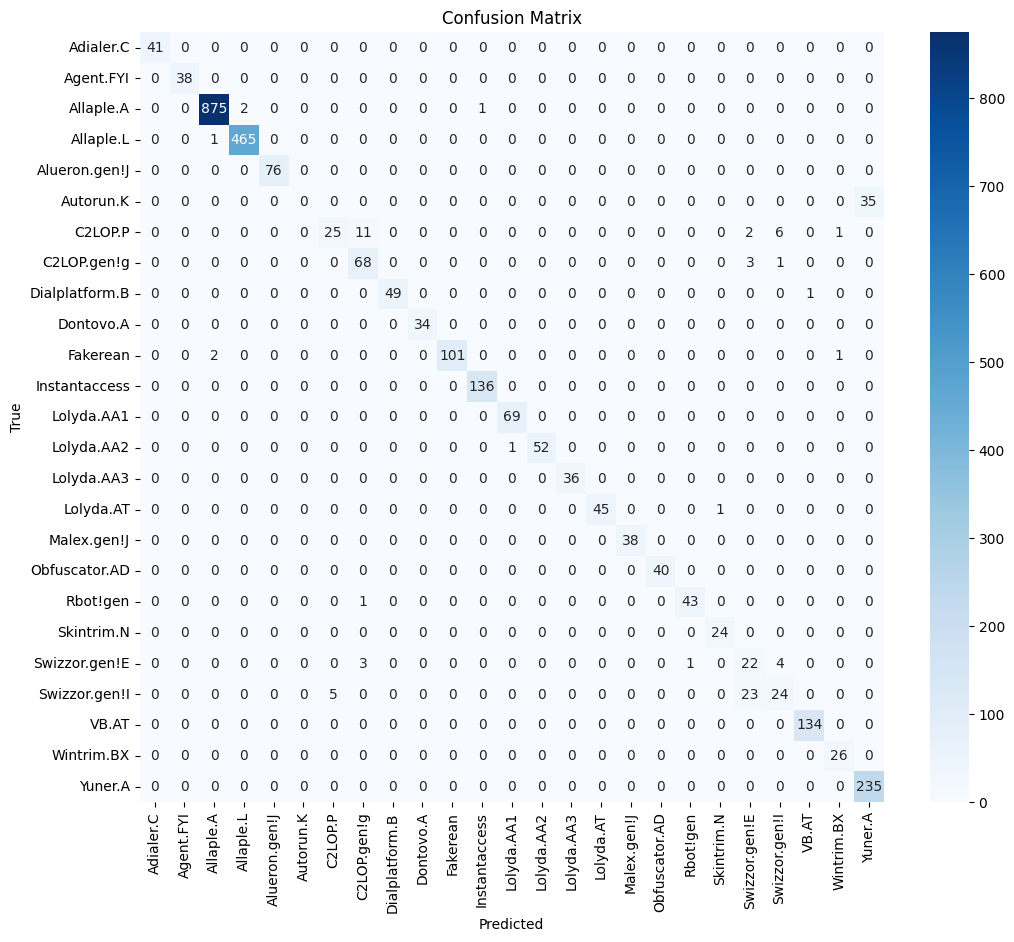

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Obtener las predicciones del modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Obtener los nombres de las clases
class_names = LabelBinarizer().fit(list(malware_families)).classes_

# Reporte de clasificación por clase
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

R// Podemos observar que nuestro modelo obtuvo buenos resultados, viendo que sabe clasificar muy bien imágenes con la familia de malware. Podemos ver que viendo las curvas de entrenamiento y de validación, se puede observar que no muestran señales de overfitting, ni de underfitting, viendo que el crecimiento y la perdida suceden durante el mismo periodo de tiempo. A pesar de que podemos observar un accuracy mayor al 95%. Sin embargo podemos observar que las dos curvas de validación y entrenamiento tienen un ruta muy similiar. Esto nos demuestra que el modelo está aprendiendo verdaderamente y no solo está memorizando las respuestas, lo cuál se puede ver reflejado en el accuracy obtenido con los datos de prueba. Al analizar la clasificación a nivel más individual por familia de virus, podemos observar que existen pocas familias con las que el modelo tuvo problema para identificar, como: C2LOP.P, C2LOP.gen!g, Swizzor.gen!E, Swizzor.gen!I, Yuner.A.. Estas familias obtuvieron un accuracy menor a 90%, siendo Swizzor.gen!E y Swizzor.gen!I los que más difícil se le hizo al modelo de identificar teniendo un accuracy mejor a 70%.